### Generating Example Classification Data

In [1]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
%matplotlib notebook

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
def gen_data(n, h, sd1, sd2):
    x1=ss.norm.rvs(-h, sd1, n)
    y1=ss.norm.rvs(0, sd1, n)
    x2=ss.norm.rvs(h, sd2, n)
    y2=ss.norm.rvs(0, sd2, n)
    return (x1,y1,x2,y2)


In [3]:
(x1,y1,x2,y2)=gen_data(50,1,1,1.5)

In [4]:
(x1,y1,x2,y2)=gen_data(1000,1.5,1,1.5)

In [7]:
def plot_data(x1,y1,x2,y2):
    plt.figure()
    plt.plot(x1,y1,"ro",ms=2)
    plt.plot(x2,y2,"o",ms=2)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")

<IPython.core.display.Javascript object>


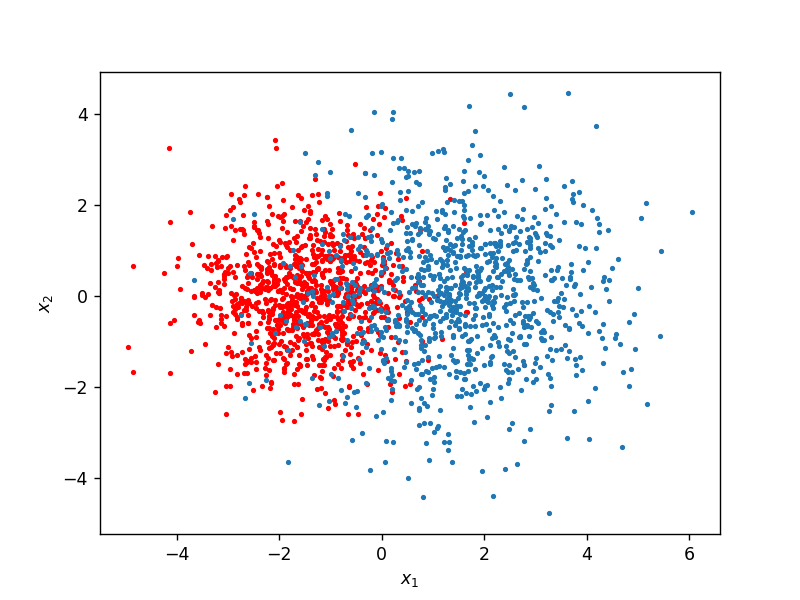

In [8]:
plot_data(x1,y1,x2,y2)

### Logistic Regression in Python Code

In [12]:
n=1000
np.vstack((x1,y1)).shape
np.vstack((x1,y1)).T.shape
X = np.vstack((np.vstack((x1,y1)).T,np.vstack((x2,y2)).T))
X.shape
y=np.hstack((np.repeat(1,n), np.repeat(2,n)))
y.shape
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=1)
clf=LogisticRegression()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.887

In [34]:
clf.predict_proba(np.array([-2,0]).reshape(1,-1))
#prints two probability that gives chances that array[-2,0]
#lies in the class 1 and 2 respectively

array([[0.96985807, 0.03014193]])

In [36]:
clf.predict(np.array([-2,0]).reshape(1,-1))
#predicts to which class the array[-2,0] belongs to.

array([1])

### Computing Predictive Probabilities Across the Grid

In [42]:
def plot_probs(ax, clf, class_no):
    xx1, xx2 = np.meshgrid(np.arange(-5, 5, 0.1), np.arange(-5, 5, 0.1))
    probs = clf.predict_proba(np.stack((xx1.ravel(), xx2.ravel()), axis=1))
    Z = probs[:,class_no]
    Z = Z.reshape(xx1.shape)
    CS = ax.contourf(xx1, xx2, Z)
    cbar = plt.colorbar(CS)
    plt.xlabel("$X_1$")
    plt.ylabel("$X_2$")

<IPython.core.display.Javascript object>


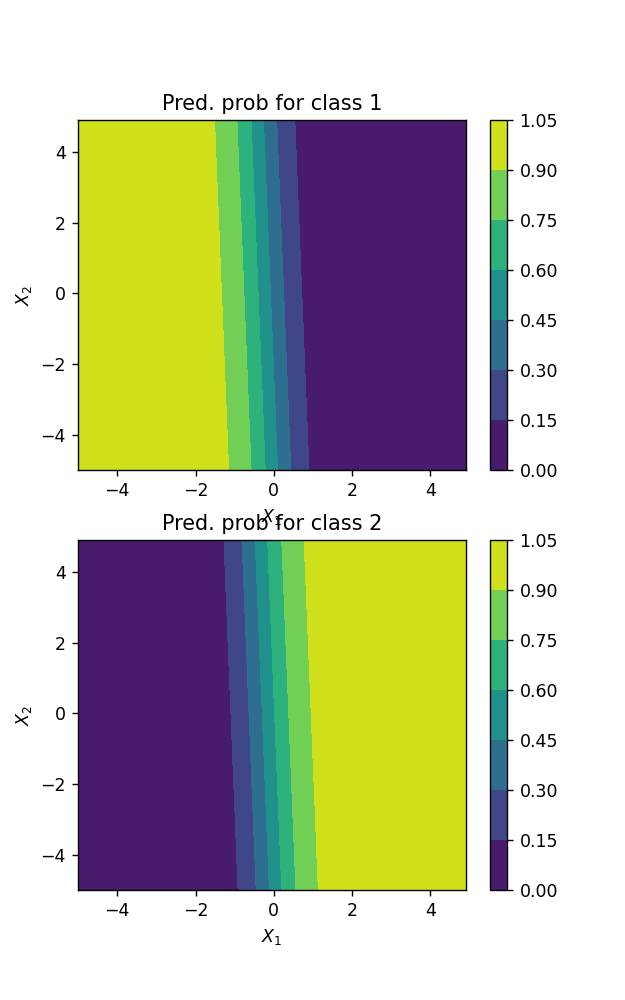

In [43]:
plt.figure(figsize=(5,8))
ax = plt.subplot(211)
plot_probs(ax, clf, 0)
plt.title("Pred. prob for class 1")
ax = plt.subplot(212)
plot_probs(ax, clf, 1)
plt.title("Pred. prob for class 2");